<a href="https://colab.research.google.com/github/Christina-Joseph/CE888-7-SP-Data-Science-and-Decision-Making/blob/main/Agrotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries

In [193]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
#Loading the Plant dataset
Plant_df = pd.read_excel('Plant_Data.xlsx')
#returns first five rows of the dataset
Plant_df

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


In [195]:
#reading the flight dataset
flight_df = pd.read_excel('Flight_Data.xlsx')
flight_df

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01
5,468,2020-07-01
6,469,2020-07-06
7,471,2020-07-02
8,472,2020-07-02
9,473,2020-07-02


In [196]:
#loading the planting dataset
Planting_df = pd.read_excel('Planting_Data.xlsx')
Planting_df

,Crop,Crop2,Crop3,Crop4,Crop5,Crop6,Crop7,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06,NaN,0,NaN,392,198912,6
1,3,NaN,NaN,2020-02-07,NaN,0,NaN,503,63840,6
2,3,NaN,NaN,2020-02-07,NaN,0,NaN,614,179928,6
3,3,NaN,NaN,2020-02-08,NaN,0,NaN,725,200256,6
4,3,NaN,NaN,2020-02-10,NaN,0,NaN,770,13944,7
...,...,...,...,...,...,...,...,...,...,...
1816,1,NaN,NaN,2020-08-12,NaN,1,NaN,158,142500,33
1817,1,NaN,NaN,2020-08-21,NaN,1,NaN,388,98208,34
1818,1,NaN,NaN,2020-08-25,NaN,1,NaN,390,256358,35
1819,1,NaN,NaN,2020-08-27,NaN,1,NaN,389,85500,35


In [197]:
#reading weather dataset
weather_df = pd.read_excel('weather_Data.xlsx')
weather_df.info


<bound method DataFrame.info of      Unnamed: 0  Solar Radiation [avg]  ...  Dew Point [min]  ET0 [result]
0    2014-05-14                    159  ...              5.6           NaN
1    2014-05-15                    280  ...              3.0           3.6
2    2014-05-16                    186  ...              6.5           2.9
3    2014-05-17                    221  ...              8.1           3.6
4    2014-05-18                    255  ...              8.3           4.2
...         ...                    ...  ...              ...           ...
2551 2021-05-17                    196  ...              8.8           NaN
2552 2021-05-17                    173  ...              8.2           NaN
2553 2021-05-18                    311  ...              3.0           3.4
2554 2021-05-19                    232  ...              5.2           3.0
2555 2021-05-20                     44  ...              3.6           NaN

[2556 rows x 14 columns]>

#Handling Missing values

In [198]:
#adding flight dates from 2020 planting data.
new = pd.merge(Plant_df, flight_df, how='inner', on= 'Batch Number')
new

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date_x,Remove,Flight Date_y
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN,2020-04-30
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,693,NaT,4,621.0,188.0,120.0,85.0,1.411765,NaN,0.293344,780.0,85,2020-09-25,NaT,NaN,2020-09-10
3396,693,NaT,1,680.0,273.0,120.0,90.0,1.333333,NaN,0.402308,834.0,85,2020-09-25,NaT,NaN,2020-09-10
3397,693,NaT,2,583.0,203.0,115.0,92.0,1.250000,NaN,0.318650,726.0,85,2020-09-25,NaT,NaN,2020-09-10
3398,693,NaT,3,609.0,213.0,120.0,90.0,1.333333,NaN,0.313889,769.0,85,2020-09-25,NaT,NaN,2020-09-10


In [199]:
#succesfully merged the flight date from flight dataset to Plant dataset and named as new
new.columns

Index(['Batch Number', 'Plant Date', 'Class', 'Fresh Weight (g)',
       'Head Weight (g)', 'Radial Diameter (mm)', 'Polar Diameter (mm)',
       'Diameter Ratio', 'Leaves', 'Density (kg/L)', 'Leaf Area (cm^2)',
       'Square ID', 'Check Date', 'Flight Date_x', 'Remove', 'Flight Date_y'],
      dtype='object')

In [200]:
#checking null values
print(new.isnull().sum())

Batch Number               0
Plant Date                40
Class                      0
Fresh Weight (g)           1
Head Weight (g)           98
Radial Diameter (mm)      98
Polar Diameter (mm)       98
Diameter Ratio            99
Leaves                  3305
Density (kg/L)            99
Leaf Area (cm^2)           1
Square ID                  0
Check Date                 0
Flight Date_x           2928
Remove                  3334
Flight Date_y              0
dtype: int64


In [201]:
#dropping Flight Date_x column as we already added Flight Dates from Flight dataset
new.drop('Flight Date_x', axis=1, inplace=True)
#dropping Diameter Ratio, Head Weight (g) and Density (kg/L) columns because it is not used for prediction
new.drop('Diameter Ratio',axis=1, inplace = True)
new.drop('Head Weight (g)',axis=1, inplace = True)
new.drop('Density (kg/L)',axis=1, inplace = True)
#filling Nan values with mean values of Leaves column for future purpose of prediction
new['Leaves'].fillna(value=new['Leaves'].mean(),inplace=True)
print(new.isnull().sum())
new.head()

Batch Number               0
Plant Date                40
Class                      0
Fresh Weight (g)           1
Radial Diameter (mm)      98
Polar Diameter (mm)       98
Leaves                     0
Leaf Area (cm^2)           1
Square ID                  0
Check Date                 0
Remove                  3334
Flight Date_y              0
dtype: int64


,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date_y
0,402,2020-04-11,3,15.0,NaN,NaN,10.0,185.0,208,2020-04-30,NaN,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,11.0,156.0,208,2020-04-30,NaN,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,12.0,137.0,208,2020-04-30,NaN,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,10.0,225.0,208,2020-04-30,NaN,2020-04-30
4,402,2020-04-11,3,15.0,NaN,NaN,11.0,157.0,208,2020-04-30,NaN,2020-04-30


In [202]:
# dropping all the Nan values except the column Remove as specified not to drop Nan values of remove column
new['Remove'].value_counts()
new = new.loc[new['Remove'] != 'r']
new.dropna(subset=[n for n in new if n != 'Remove'],inplace= True)
new.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date_y
25,402,2020-04-11,2,213.0,55.0,55.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30
27,402,2020-04-11,5,179.0,40.0,40.0,10.810526,643.0,570,2020-05-22,NaN,2020-04-30
28,402,2020-04-11,5,183.0,50.0,50.0,10.810526,647.0,570,2020-05-22,NaN,2020-04-30
29,402,2020-04-11,3,176.0,40.0,40.0,10.810526,694.0,570,2020-05-22,NaN,2020-04-30
30,402,2020-04-11,1,192.0,70.0,70.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30


In [203]:
#renaming Flight Date_y to Flight Date
new.rename(columns={"Flight Date_y": "Flight Date"},inplace=True)
#creating a variable called days_to_check that converts flight_date into number of days from plant_date.
new['days_to_check'] = (new['Flight Date'] - new['Plant Date'])
new

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date,days_to_check
25,402,2020-04-11,2,213.0,55.0,55.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30,19 days
27,402,2020-04-11,5,179.0,40.0,40.0,10.810526,643.0,570,2020-05-22,NaN,2020-04-30,19 days
28,402,2020-04-11,5,183.0,50.0,50.0,10.810526,647.0,570,2020-05-22,NaN,2020-04-30,19 days
29,402,2020-04-11,3,176.0,40.0,40.0,10.810526,694.0,570,2020-05-22,NaN,2020-04-30,19 days
30,402,2020-04-11,1,192.0,70.0,70.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30,19 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,693,2020-08-08,1,81.0,36.0,40.0,10.810526,247.0,290,2020-09-17,NaN,2020-09-10,33 days
3376,693,2020-08-08,1,103.0,40.0,50.0,10.810526,211.0,290,2020-09-17,NaN,2020-09-10,33 days
3377,693,2020-08-08,3,132.0,40.0,40.0,10.810526,337.0,290,2020-09-17,NaN,2020-09-10,33 days
3378,693,2020-08-08,2,183.0,50.0,45.0,10.810526,370.0,290,2020-09-17,NaN,2020-09-10,33 days


In [204]:
#resetting index
new_df = new.reset_index(drop=True)
new_df


,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date,days_to_check
0,402,2020-04-11,2,213.0,55.0,55.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30,19 days
1,402,2020-04-11,5,179.0,40.0,40.0,10.810526,643.0,570,2020-05-22,NaN,2020-04-30,19 days
2,402,2020-04-11,5,183.0,50.0,50.0,10.810526,647.0,570,2020-05-22,NaN,2020-04-30,19 days
3,402,2020-04-11,3,176.0,40.0,40.0,10.810526,694.0,570,2020-05-22,NaN,2020-04-30,19 days
4,402,2020-04-11,1,192.0,70.0,70.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30,19 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,693,2020-08-08,1,81.0,36.0,40.0,10.810526,247.0,290,2020-09-17,NaN,2020-09-10,33 days
3192,693,2020-08-08,1,103.0,40.0,50.0,10.810526,211.0,290,2020-09-17,NaN,2020-09-10,33 days
3193,693,2020-08-08,3,132.0,40.0,40.0,10.810526,337.0,290,2020-09-17,NaN,2020-09-10,33 days
3194,693,2020-08-08,2,183.0,50.0,45.0,10.810526,370.0,290,2020-09-17,NaN,2020-09-10,33 days


In [205]:
new_df.describe()

,Batch Number,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,days_to_check
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3.196000e+03,3196.000000,3196.000000,3196
mean,584.670213,2.966521,557.754891,110.176471,102.315707,1.081053e+01,479.795369,401.302879,34 days 05:27:06.533166458
std,77.804374,1.433275,301.085208,41.060399,33.587978,4.779148e-13,194.395204,438.125793,5 days 19:42:50.568719911
min,402.000000,1.000000,0.632000,0.000000,0.000000,1.081053e+01,93.000000,4.000000,14 days 00:00:00
25%,517.000000,2.000000,309.000000,80.000000,80.000000,1.081053e+01,338.000000,84.000000,32 days 00:00:00
50%,608.000000,3.000000,545.000000,125.000000,110.000000,1.081053e+01,459.000000,252.000000,33 days 00:00:00
75%,649.000000,4.000000,781.000000,140.000000,130.000000,1.081053e+01,586.000000,555.000000,37 days 00:00:00
max,693.000000,5.000000,1978.000000,185.000000,178.000000,1.081053e+01,1276.000000,2019.000000,48 days 00:00:00


Dropping all the Nan values from Planting and weather dataset

In [206]:
Planting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Crop            1821 non-null   int64         
 1   Crop2           0 non-null      float64       
 2   Crop3           0 non-null      float64       
 3   Crop4           1821 non-null   datetime64[ns]
 4   Crop5           0 non-null      float64       
 5   Crop6           1821 non-null   int64         
 6   Crop7           0 non-null      float64       
 7   Planting_Batch  1821 non-null   int64         
 8   Volume_Planted  1821 non-null   int64         
 9   Planting_Wk     1821 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 142.4 KB


In [207]:
#First dropping empty columns and then dropping Nan values for each columns in Planting dataset
Planting_df.drop(columns=['Crop2','Crop3','Crop5','Crop7'],axis=1,inplace=True)
Planting_df.dropna()

,Crop,Crop4,Crop6,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06,0,392,198912,6
1,3,2020-02-07,0,503,63840,6
2,3,2020-02-07,0,614,179928,6
3,3,2020-02-08,0,725,200256,6
4,3,2020-02-10,0,770,13944,7
...,...,...,...,...,...,...
1816,1,2020-08-12,1,158,142500,33
1817,1,2020-08-21,1,388,98208,34
1818,1,2020-08-25,1,390,256358,35
1819,1,2020-08-27,1,389,85500,35


In [208]:
weather_df.isnull().sum()

Unnamed: 0                  0
Solar Radiation [avg]       0
Precipitation [sum]         0
Wind Speed [avg]            0
Wind Speed [max]            0
Battery Voltage [last]      0
Leaf Wetness [time]         0
Air Temperature [avg]       0
Air Temperature [max]       0
Air Temperature [min]       0
Relative Humidity [avg]     0
Dew Point [avg]             3
Dew Point [min]            46
ET0 [result]               66
dtype: int64

In [209]:
weather_df.dropna()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
5,2014-05-19,261,0.0,3.0,6.4,6854,490,18.26,26.50,9.42,66.41,10.8,8.5,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,2021-05-11,211,0.2,2.0,5.4,6874,0,11.18,17.18,3.52,86.24,8.4,3.4,2.9
2542,2021-05-12,190,0.0,1.8,4.4,6864,0,11.28,16.29,5.76,85.16,8.3,4.9,2.6
2547,2021-05-15,101,3.2,1.5,4.1,6874,0,9.70,11.98,6.83,99.87,9.5,6.7,1.2
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4


In [210]:
#extracting year, date and month from Unnamed:0 Column 
weather_df['Year'] = weather_df['Unnamed: 0'].dt.year
weather_df['date'] = weather_df['Unnamed: 0'].dt.day
weather_df['month'] = weather_df['Unnamed: 0'].dt.month

In [211]:
weather_df

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result],Year,date,month
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN,2014,14,5
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6,2014,15,5
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9,2014,16,5
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6,2014,17,5
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2,2014,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN,2021,17,5
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN,2021,17,5
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4,2021,18,5
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0,2021,19,5


In [212]:
#creating a new column for the difference in  Check date' and 'Plant date', assuming this is the time when crops takes to grow about 95%.
new_df['Yielding_time']  = (new_df['Check Date'] - new_df['Plant Date']).dt.days
new_df

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date,days_to_check,Yielding_time
0,402,2020-04-11,2,213.0,55.0,55.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30,19 days,41
1,402,2020-04-11,5,179.0,40.0,40.0,10.810526,643.0,570,2020-05-22,NaN,2020-04-30,19 days,41
2,402,2020-04-11,5,183.0,50.0,50.0,10.810526,647.0,570,2020-05-22,NaN,2020-04-30,19 days,41
3,402,2020-04-11,3,176.0,40.0,40.0,10.810526,694.0,570,2020-05-22,NaN,2020-04-30,19 days,41
4,402,2020-04-11,1,192.0,70.0,70.0,10.810526,730.0,570,2020-05-22,NaN,2020-04-30,19 days,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,693,2020-08-08,1,81.0,36.0,40.0,10.810526,247.0,290,2020-09-17,NaN,2020-09-10,33 days,40
3192,693,2020-08-08,1,103.0,40.0,50.0,10.810526,211.0,290,2020-09-17,NaN,2020-09-10,33 days,40
3193,693,2020-08-08,3,132.0,40.0,40.0,10.810526,337.0,290,2020-09-17,NaN,2020-09-10,33 days,40
3194,693,2020-08-08,2,183.0,50.0,45.0,10.810526,370.0,290,2020-09-17,NaN,2020-09-10,33 days,40


#Visualizing the Data


<function matplotlib.pyplot.show>

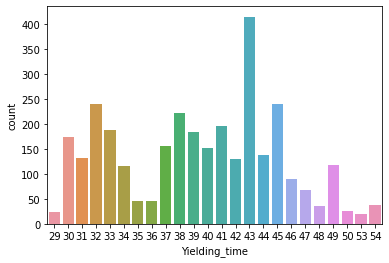

In [213]:
sns.countplot(x = 'Yielding_time' , data=new_df )
plt.show

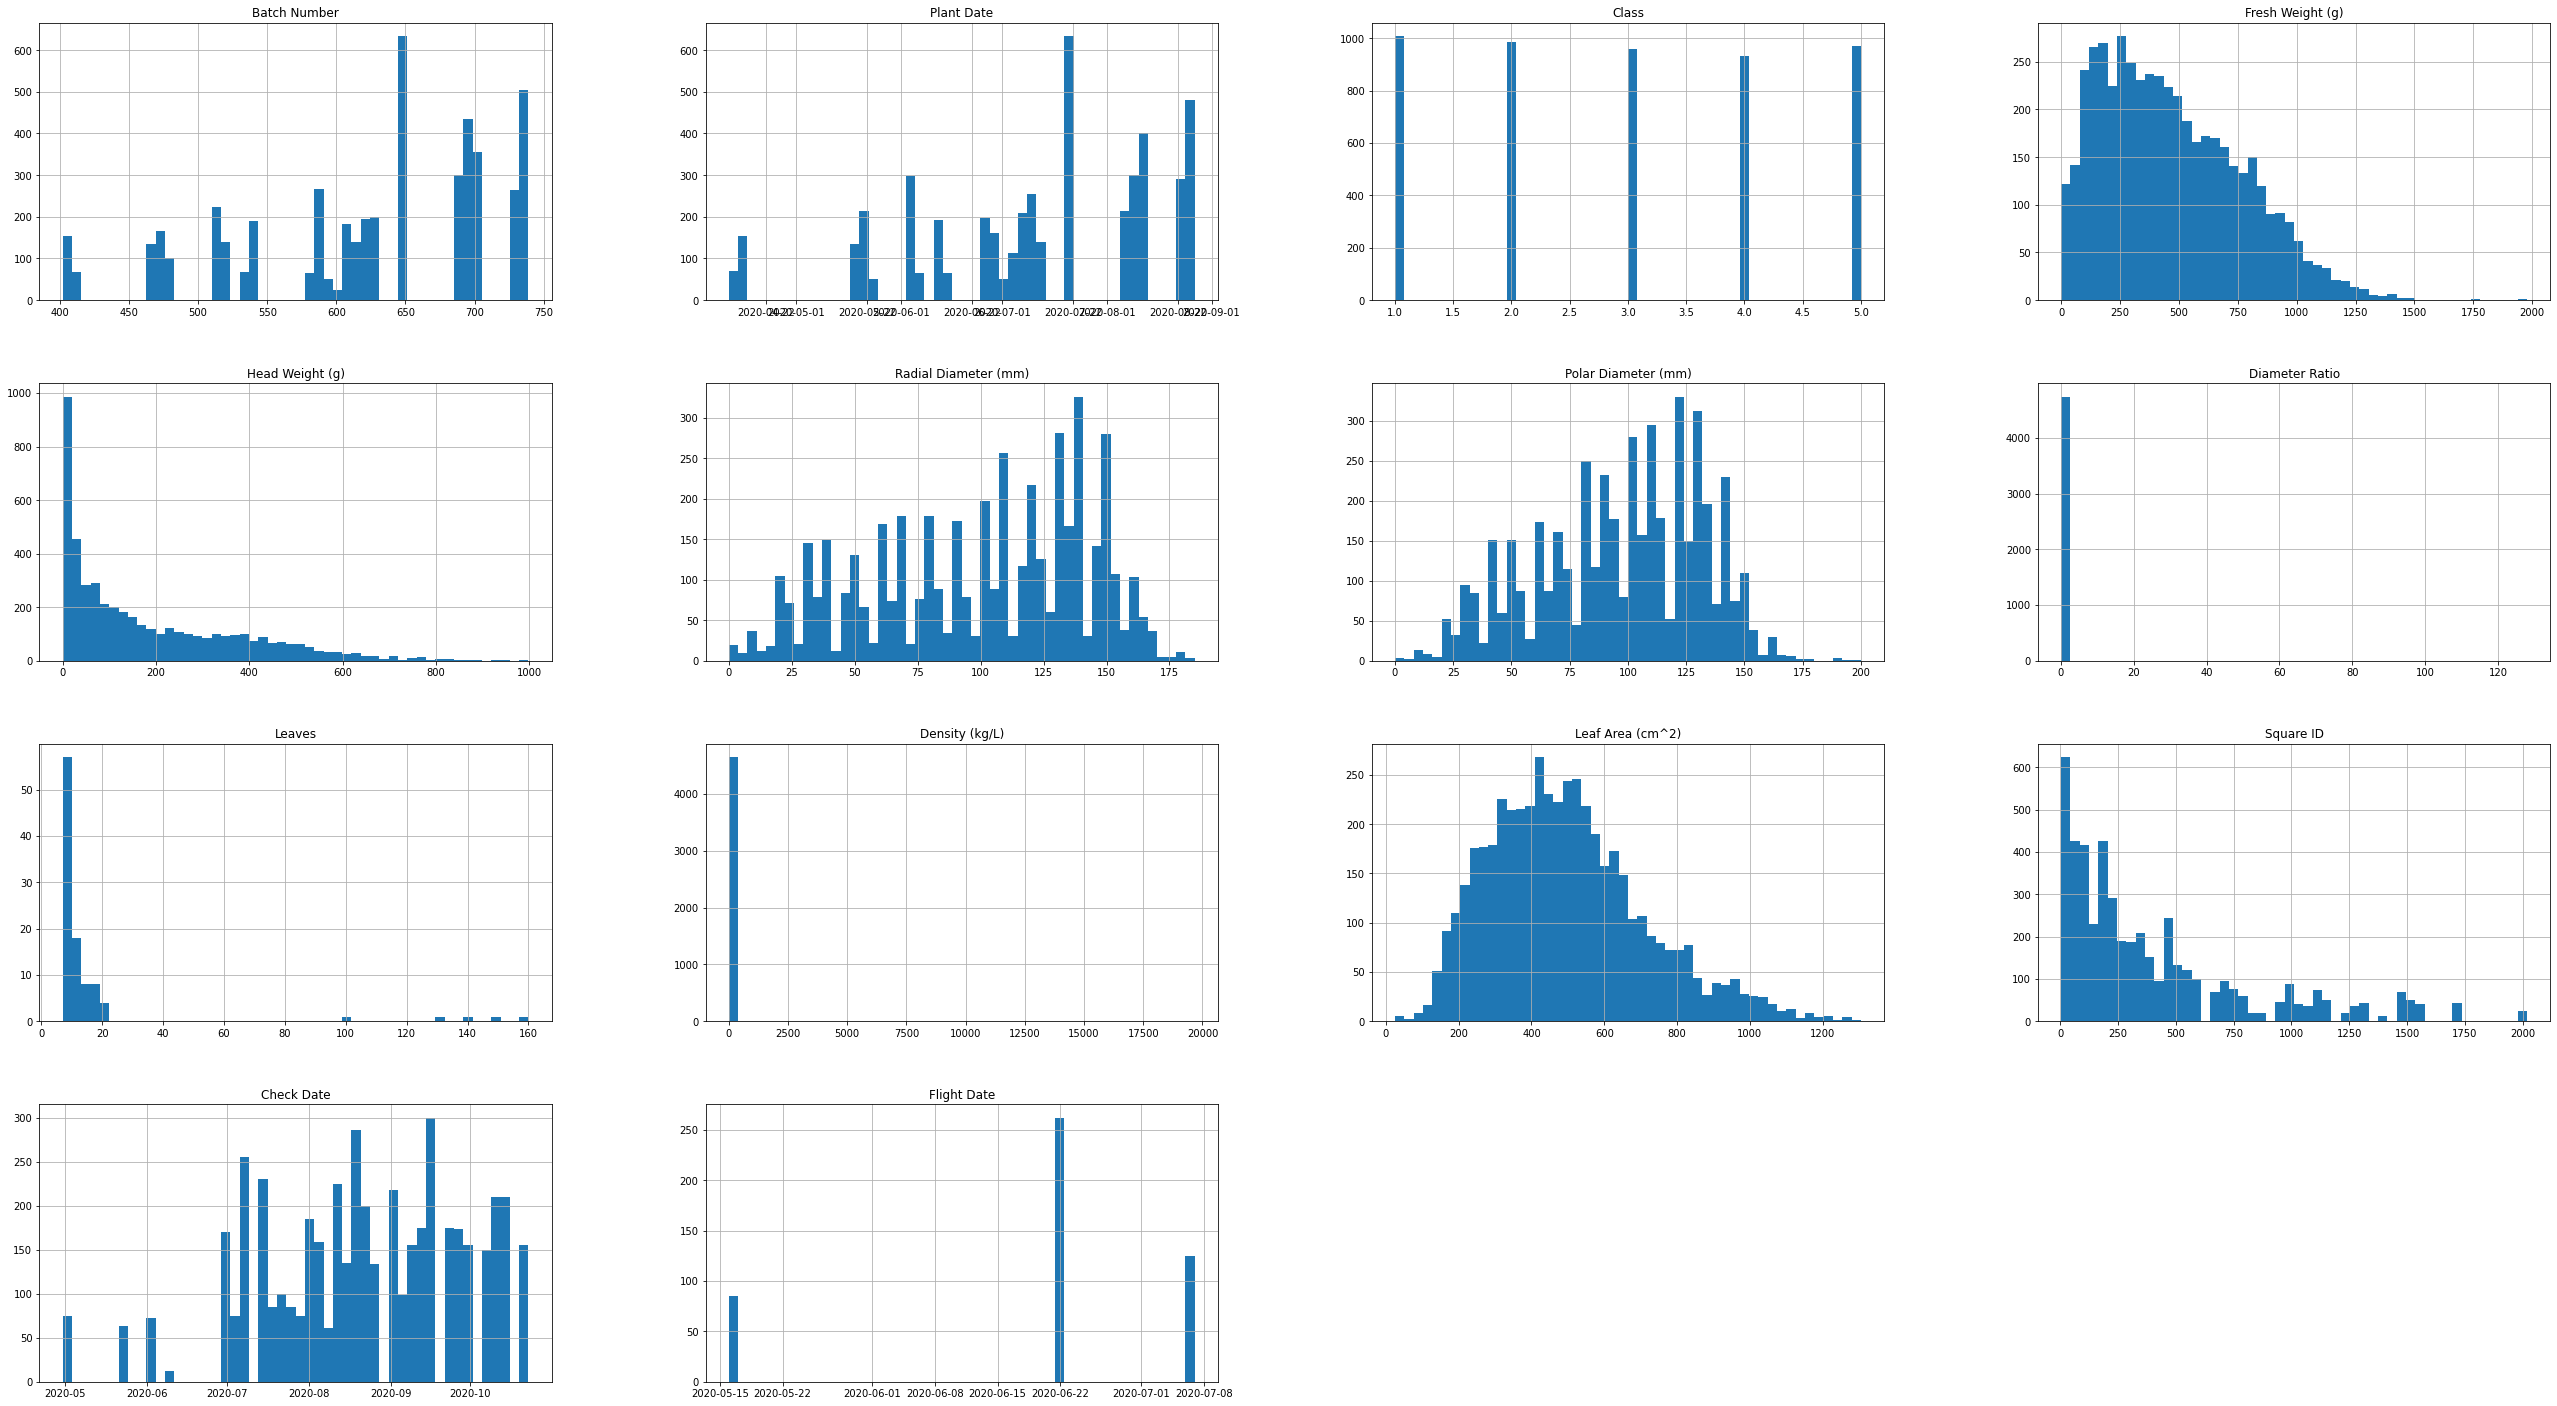

In [214]:
Plant_df_plot = Plant_df.hist(bins=50, figsize=(45,25))

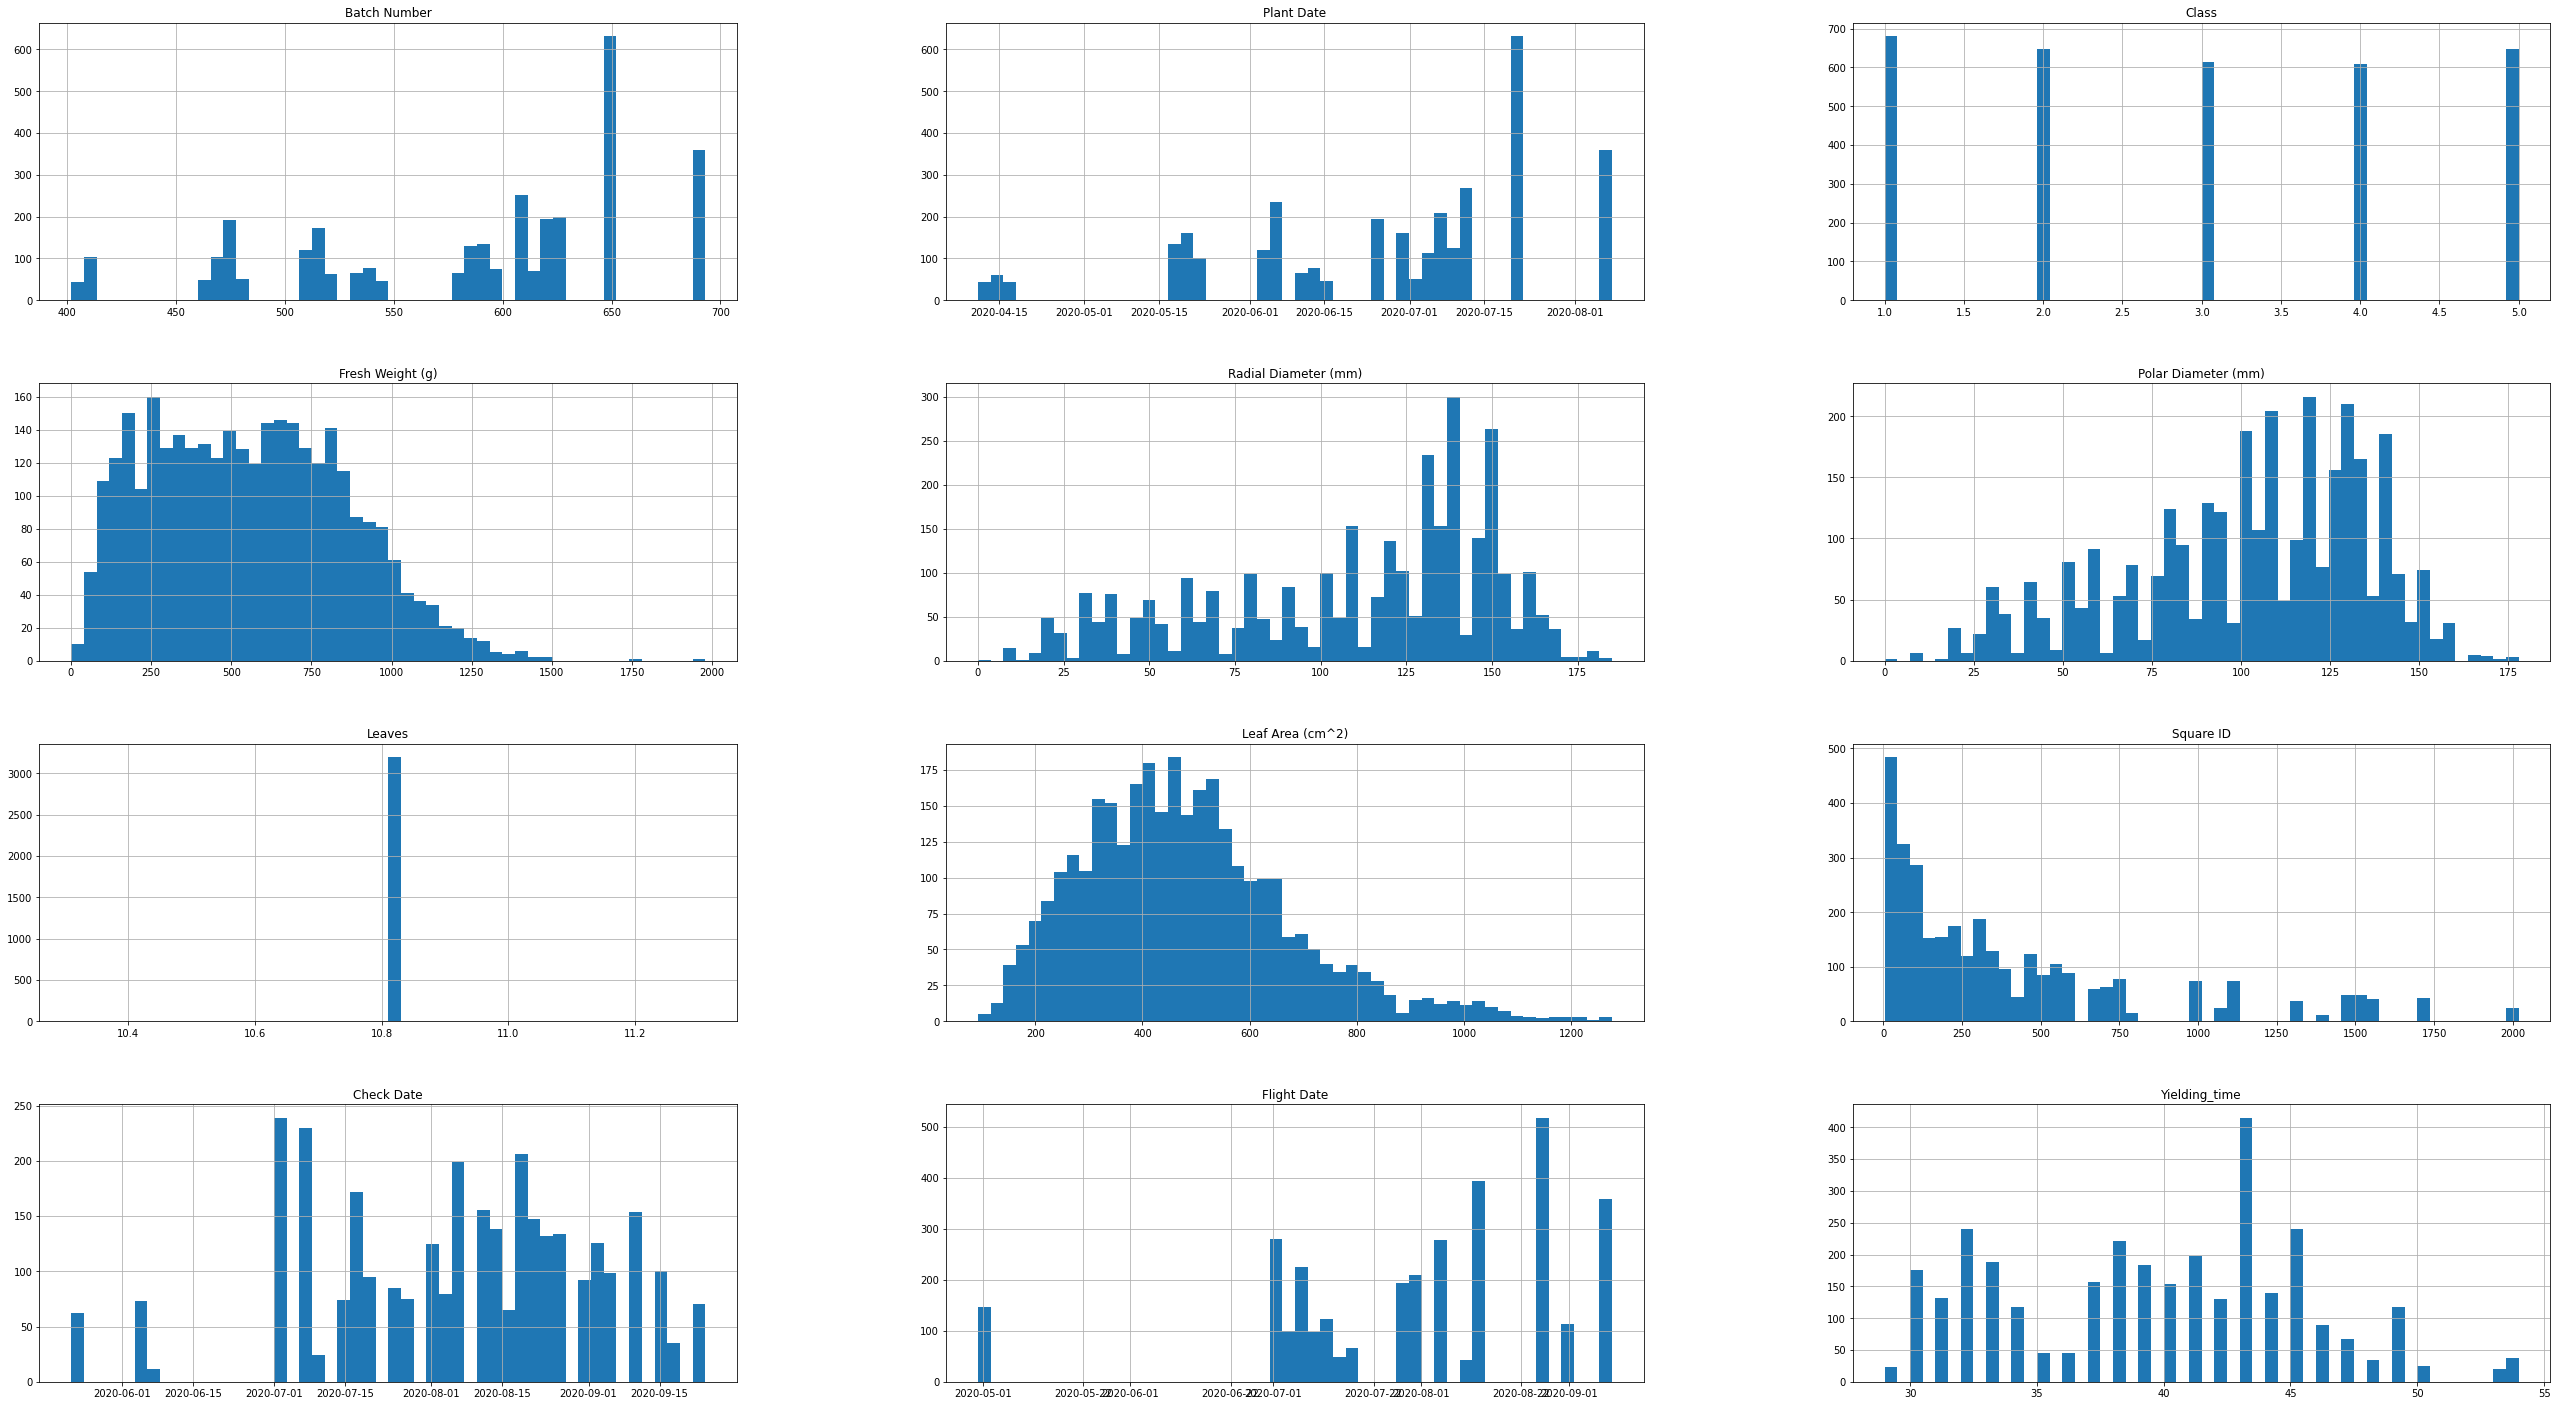

In [215]:
new_df_plot = new_df.hist(bins=50, figsize=(45,25))

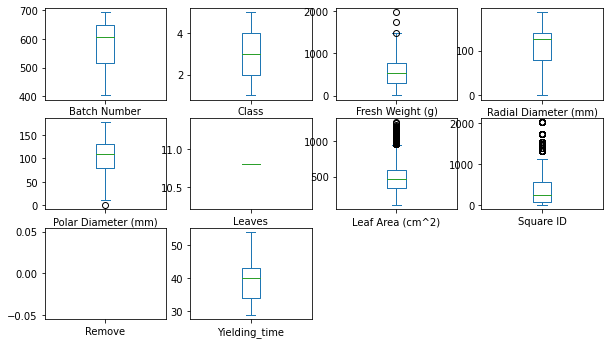

In [216]:
new_df.plot(kind='box', subplots=True, figsize=(10, 40),layout=(20,4),  sharex=False, sharey=False)
plt.show()